<a href="https://colab.research.google.com/github/Luj2000/projects/blob/main/Financial%20analysis%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np
from datetime import date 
import matplotlib.pyplot as plt
import pandas_datareader.data as pdr
import yfinance as yf


In [ ]:
start = date (2016 ,1 ,1)
end = date.today()

In [ ]:
portfolio = ["AAL", "DAL", "LUV"]

In [ ]:
df = pd.DataFrame()

def workcap(x):
    return (x.balance_sheet.loc['Total Current Assets'] / x.balance_sheet.loc['Total Current Liabilities']).to_numpy()[0]

for i in portfolio:
    s = yf.Ticker(i)
    df[i] = pd.Series([workCap(s),s.info['quickRatio'], s.info['forwardEps'],s.info['forwardPE'], s.info['debtToEquity'], s.info['returnOnEquity']])

df.columns = portfolio
df.index = ['workCap', 'quickRatio','forward EPS','forward PE','D/E','ROE' ]


In [ ]:
df

,AAL,DAL,LUV
workCap,0.912133,0.760279,1.968136
quickRatio,0.631000,0.527000,1.522000
forward EPS,1.590000,5.540000,3.670000
forward PE,9.550315,6.180506,10.741143
D/E,NaN,883.521000,107.923000
ROE,NaN,0.235660,0.095730


In [ ]:
new = yf.Ticker("CCL")
new.balance_sheet.T

,Intangible Assets,Capital Surplus,Total Liab,Total Stockholder Equity,Other Current Liab,Total Assets,Common Stock,Other Current Assets,Retained Earnings,Other Liab,...,Other Stockholder Equity,Property Plant Equipment,Total Current Assets,Long Term Investments,Net Tangible Assets,Short Term Investments,Net Receivables,Long Term Debt,Inventory,Accounts Payable
,,,,,,,,,,,,,,,,,,,,,
2021-11-30,1.181000e+09,1.529200e+10,4.120000e+10,1.214400e+10,3.111000e+09,5.334400e+10,372000000.0,1000000.0,6.448000e+09,1.042000e+09,...,-1.502000e+09,3.944000e+10,1.013300e+10,242000000.0,1.038400e+10,200000000.0,246000000.0,2.851100e+10,356000000.0,797000000.0
2020-11-30,1.186000e+09,1.394800e+10,3.303800e+10,2.055500e+10,1.941000e+09,5.359300e+10,372000000.0,135000000.0,1.607500e+10,9.440000e+08,...,-1.436000e+09,3.944300e+10,1.056300e+10,289000000.0,1.856200e+10,NaN,273000000.0,2.213500e+10,335000000.0,624000000.0
2019-11-30,1.174000e+09,8.807000e+09,1.969300e+10,2.536500e+10,4.737000e+09,4.505800e+10,365000000.0,31000000.0,2.665300e+10,8.820000e+08,...,-2.066000e+09,3.813100e+10,2.059000e+09,204000000.0,2.127900e+10,NaN,598000000.0,9.684000e+09,427000000.0,756000000.0
2018-11-30,1.176000e+09,8.756000e+09,1.795800e+10,2.444300e+10,4.406000e+09,4.240100e+10,365000000.0,NaN,2.506600e+10,8.450000e+08,...,-1.949000e+09,3.533600e+10,2.226000e+09,244000000.0,2.034200e+10,NaN,358000000.0,7.908000e+09,450000000.0,730000000.0


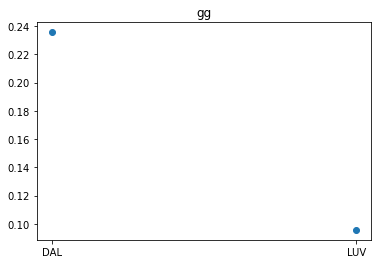

In [ ]:
plt.scatter(portfolio, df.loc["ROE"])
plt.title("gg");

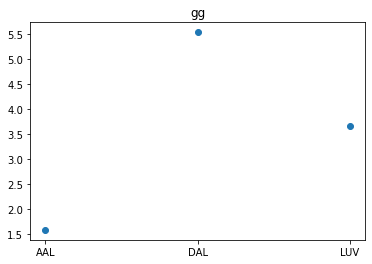

In [ ]:
plt.scatter(portfolio, df.loc["forward EPS"])
plt.title("gg");

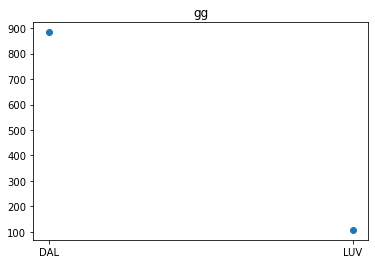

In [ ]:
plt.scatter(portfolio, df.loc["D/E"])
plt.title("gg");

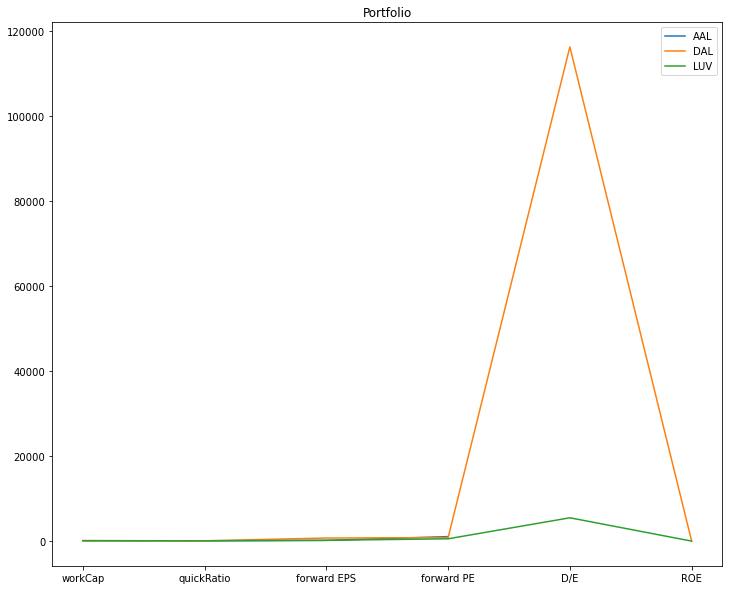

In [ ]:
(df/df.iloc[0] * 100).plot(figsize=(12,10))
plt.title("Portfolio");

In [ ]:
returns = np.log(df/df.shift(1))
returns

,AAL,DAL,LUV
workCap,NaN,NaN,NaN
quickRatio,-0.368480,-0.366484,-0.257062
forward EPS,0.924183,2.352549,0.880166
forward PE,1.804949,0.117115,1.074397
D/E,NaN,4.954805,2.306829
ROE,NaN,-8.229280,-7.027642


In [ ]:
returns.mean()* 252

AAL    198.294846
DAL    -59.033257
LUV   -152.374852
dtype: float64

In [ ]:
returns.cov()*252

,AAL,DAL,LUV
AAL,301.161961,109.072762,190.468187
DAL,109.072762,6153.794451,4463.219640
LUV,190.468187,4463.219640,3457.202394


In [ ]:
noa = len(portfolio)
weights = np.random.random(noa)
weights /= np.sum(weights)
weights

array([0.3788704 , 0.58105558, 0.04007402])

In [ ]:
expected_return = np.sum(returns.mean() * weights) * 252
expected_return

34.72017119431344

In [ ]:
expected_variance = np.dot(weights.T, np.dot (returns.cov()*252, weights ))
expected_variance

2388.1216283011577

In [ ]:
mc_returns = []
mc_volatility = []

for i in range(2500):
    weights = np.random.random(noa)
    weights /= np.sum(weights)
    mc_returns.append(np.sum(returns.mean() * weights) * 252)
    mc_volatility.append(np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights ))))
    
    
    
mreturns = np.array(mc_returns) 
mvolatility = np.array(mc_volatility)


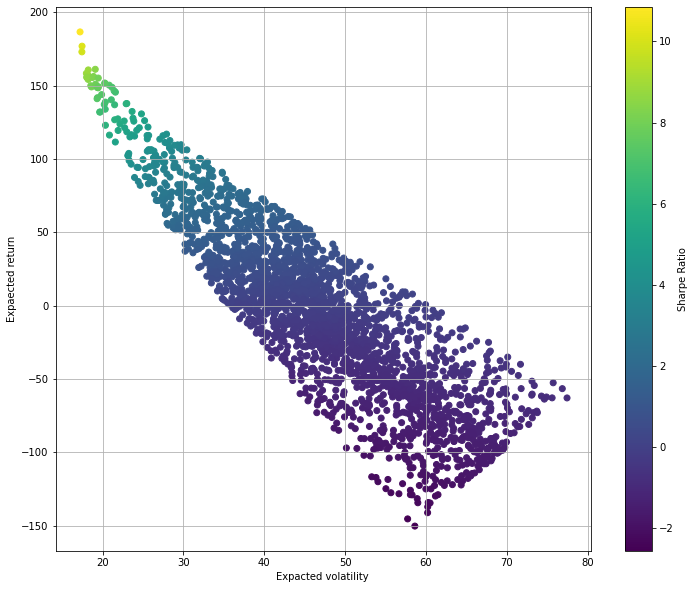

In [ ]:
plt.figure(figsize=(12,10))
color = mreturns/mvolatility 
plt.scatter(mvolatility, mreturns , c=color, marker="o")
plt.grid(True)
plt.xlabel("Expacted volatility ")
plt.ylabel("Expaected return")
plt.colorbar(label="Sharpe Ratio");

In [ ]:
plt.acatter(df.columns, df.loc["ForwardEPS"])
plt.title("gg");

AttributeError: module 'matplotlib.pyplot' has no attribute 'acatter'